# **総合課題1：タイタニックデータの概要把握**
#### 第４学年 情報・ソフトウェア系 17番　佐々木祥晶



<br>

#### データの準備

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic = sns.load_dataset('titanic')

#### データフレームの先頭データを表示

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 読み込んだデータの基本統計情報を表示
> 注) survived の平均値は生存率を意味する

In [26]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<br>
<br>

 ### 設問１． 女性，男性の生存率はそれぞれ幾つか？

In [27]:
titanic.groupby("sex").describe()

survived                           ...       fare                       
          count      mean       std  min  ...        25%   50%    75%       max
sex                                       ...                                  
female    314.0  0.742038  0.438211  0.0  ...  12.071875  23.0  55.00  512.3292
male      577.0  0.188908  0.391775  0.0  ...   7.895800  10.5  26.55  512.3292

[2 rows x 48 columns]

### 解答
  - 女性の生存率： 約74.20%
  - 男性の生存率： 約18.89%

#### factorplot 関数で性別と生存率を可視化

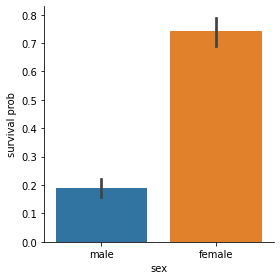

In [28]:
sex_survived = sns.catplot(x="sex", y="survived", data=titanic, kind="bar", height=4)
sex_survived = sex_survived.set_ylabels("survival prob")
plt.show()

#### countplot 関数で性別ごとの生存者数を可視化

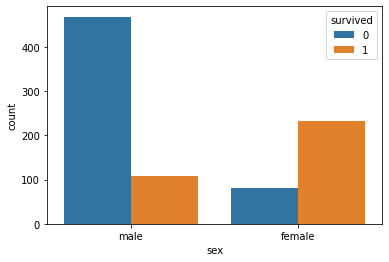

In [29]:
count_survived = sns.countplot(x="sex", hue="survived", data=titanic)
plt.show()

<br>
<br>

### 設問２． 1等級，3等級のチケットを持っていた乗客の生存率はそれぞれ幾つか？

In [30]:
titanic.groupby("pclass").describe()

survived                           ...      fare                         
          count      mean       std  min  ...       25%      50%   75%       max
pclass                                    ...                                   
1         216.0  0.629630  0.484026  0.0  ...  30.92395  60.2875  93.5  512.3292
2         184.0  0.472826  0.500623  0.0  ...  13.00000  14.2500  26.0   73.5000
3         491.0  0.242363  0.428949  0.0  ...   7.75000   8.0500  15.5   69.5500

[3 rows x 40 columns]

### 解答
  - １等級チケットを持った乗客の生存率: 約 62.96%
  - ３等級チケットを持った乗客の生存率: 約 24.24%

#### チケットクラスと生存率を可視化

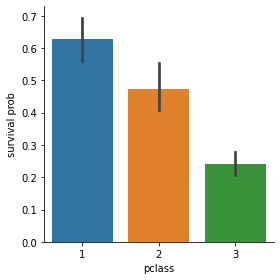

In [31]:
pclass_survived = sns.catplot(x="pclass", y="survived", data=titanic, kind="bar", height=4)
pclass_survived = pclass_survived.set_ylabels("survival prob")
plt.show()

<br>
<br>

### 設問３．使用したデータセットに含まれる10歳未満の乗客の数は幾つか？

In [32]:
len(titanic[titanic["age"] < 10])

62

### 解答
  - 10歳未満の乗客数: 62人

<br>
<br>

### 設問４．使用したデータセットにおいて，10歳未満の乗客の生存率は幾つか？

In [33]:
titanic[titanic["age"] < 10].describe()

,survived,pclass,age,sibsp,parch,fare
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.612903,2.629032,4.083387,1.854839,1.403226,30.576679
std,0.491062,0.579255,2.834747,1.607837,0.526656,25.195357
min,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700
25%,0.000000,2.000000,2.000000,1.000000,1.000000,18.877075
50%,1.000000,3.000000,4.000000,1.000000,1.000000,27.000000
75%,1.000000,3.000000,6.000000,3.750000,2.000000,31.387500
max,1.000000,3.000000,9.000000,5.000000,2.000000,151.550000


### 解答
  - 10 歳未満の乗客の生存率: 約 61.29%



<br>
<br>

### 設問５．その他，自分で解析

#### 年齢ごとの生存率を可視化

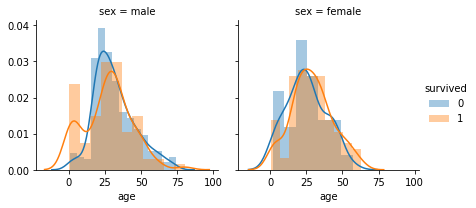

In [34]:
age_survived = sns.FacetGrid(titanic, col="sex", hue="survived")
age_survived = age_survived.map(sns.distplot, "age").add_legend()

#### 同乗した兄弟や配偶者の数と生存率を可視化

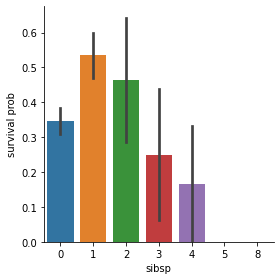

In [35]:
sibship_survived = sns.catplot(x="sibsp", y="survived", data=titanic, kind="bar", height=4)
sibship_survived = sibship_survived.set_ylabels("survival prob")
plt.show()

#### 乗船地ごとの基本統計情報

In [36]:
titanic.groupby("embark_town").describe()

survived                      ...   fare                     
               count      mean       std  ...    50%        75%       max
embark_town                               ...                            
Cherbourg      168.0  0.553571  0.498608  ...  29.70  78.500025  512.3292
Queenstown      77.0  0.389610  0.490860  ...   7.75  15.500000   90.0000
Southampton    644.0  0.336957  0.473037  ...  13.00  27.900000  263.0000

[3 rows x 48 columns]

- 乗船地がシェルブール＝オクトヴィルの乗客の生存率： 約55.36%
- 乗船地がシェルブール＝オクトヴィルの乗客の平均チケット等級： 約1.89等級
- 乗船地がシェルブール＝オクトヴィルの乗客の平均年齢： 約30.81歳
<br>

- 乗船地がクイーンズタウンの乗客の生存率： 約38.96%
- 乗船地がクイーンズタウンの乗客の平均チケット等級： 約2.91等級
- 乗船地がクイーンズタウンの乗客の平均年齢： 約28.09歳
<br>

- 乗船地がサウサンプトンの乗客の生存率：　約33.70%
- 乗船地がサウサンプトンの乗客の平均チケット等級： 約2.35等級
- 乗船地がサウサンプトンの乗客の平均年齢： 約29.45歳

> ・ シェルブール＝オクトヴィルは、フランス北西部コタンタン半島先端に位置する港湾都市<br>
> ・ クイーンズタウンは、ニュージーランド、南部のワカティプ湖のほとりに位置<br>
> ・ サウサンプトンは、イギリス南部の都市<br>